In [242]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt 

%matplotlib inline



from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 

from xgboost import XGBClassifier



from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score



import warnings

warnings.filterwarnings('ignore')

In [244]:
train=pd.read_csv('train -1.csv')

test = pd.read_csv('test -1.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
train.describe().style.background_gradient(cmap = 'Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [252]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [254]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 예시 데이터프레임 생성 (실제 데이터프레임을 사용세요하)
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# 수치형 열에 대한 중앙값 대체
numeric_features = ['Age', 'Fare']  # 수치형 열 예시
imputer_numeric = SimpleImputer(strategy='median')

# 훈련 데이터와 테스트 데이터에 대해 중앙값으로 결측값 대체
train[numeric_features] = imputer_numeric.fit_transform(train[numeric_features])
test[numeric_features] = imputer_numeric.transform(test[numeric_features])

# 범주형 열에 대한 최빈값 대체
categorical_features = ['Embarked', 'Sex', 'Cabin']  # 범주형 열 예시
imputer_categorical = SimpleImputer(strategy='most_frequent')

# 훈련 데이터와 테스트 데이터에 대해 최빈값으로 결측값 대체
train[categorical_features] = imputer_categorical.fit_transform(train[categorical_features])
test[categorical_features] = imputer_categorical.transform(test[categorical_features])

# 필요 시 데이터 타입 변환
train['Cabin'] = train['Cabin'].astype('category')
test['Cabin'] = test['Cabin'].astype('category')

# 데이터 확인
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [256]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [258]:
# 예시 데이터프레임 생성 (실제 데이터프레임을 사용하세요)
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# 결측값 처리를 위한 함수 정의
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]  # 최빈값 계산
        df[column].fillna(mode_value, inplace=True)  # 최빈값으로 결측값 대체

# 처리할 열 리스트 정의
embarked_column = ['Embarked']
cabin_columns = ['Cabin']
fare_columns = ['Fare']

# 결측값 처리 함수 호출
fill_missing_with_mode(train, embarked_column + cabin_columns)
fill_missing_with_mode(test, cabin_columns + fare_columns)

# 결측값 확인
print("Train missing values:\n", train.isnull().sum())
print("Test missing values:\n", test.isnull().sum())

Train missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Test missing values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


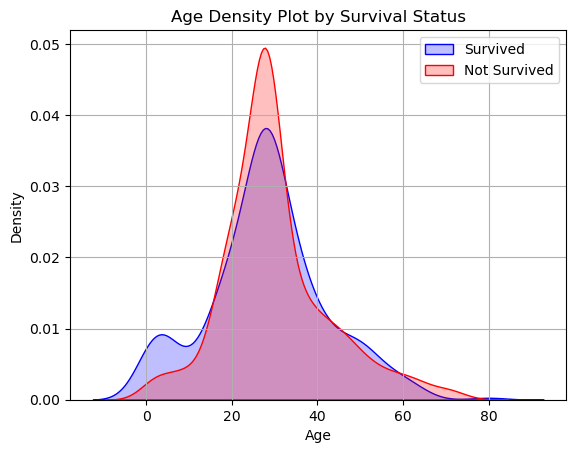

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: 나이에 따른 생존 여부 밀도 추정 곡선
def plot_age_density(train):
    # 생존자와 비생존자의 나이 데이터 확인
    survived_age = train[train['Survived'] == 1]['Age']
    not_survived_age = train[train['Survived'] == 0]['Age']
    
    # 밀도 추정 곡선 그리기
    sns.kdeplot(survived_age, label='Survived', shade=True, color='blue')
    sns.kdeplot(not_survived_age, label='Not Survived', shade=True, color='red')

    # 축 레이블 설정
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.title('Age Density Plot by Survival Status')
    plt.legend()
    plt.grid()

    # 그래프 표시
    plt.show()

# 함수 호출
plot_age_density(train)


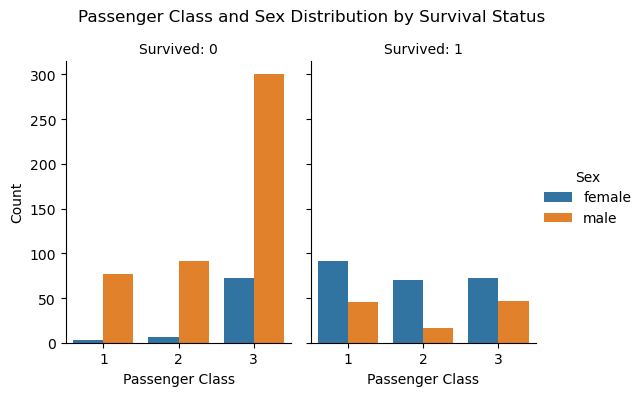

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: Pclass와 Sex에 따른 생존 여부 시각화
def plot_class_sex_survival(train):
    g = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count", height=4, aspect=0.7)

    # 각 서브플롯에 제목 추가
    g.set_titles("Survived: {col_name}")
    g.set_axis_labels("Passenger Class", "Count")
    
    # 전체 제목 추가
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Passenger Class and Sex Distribution by Survival Status')

    # 그래프 표시
    plt.show()

# 함수 호출
plot_class_sex_survival(train)


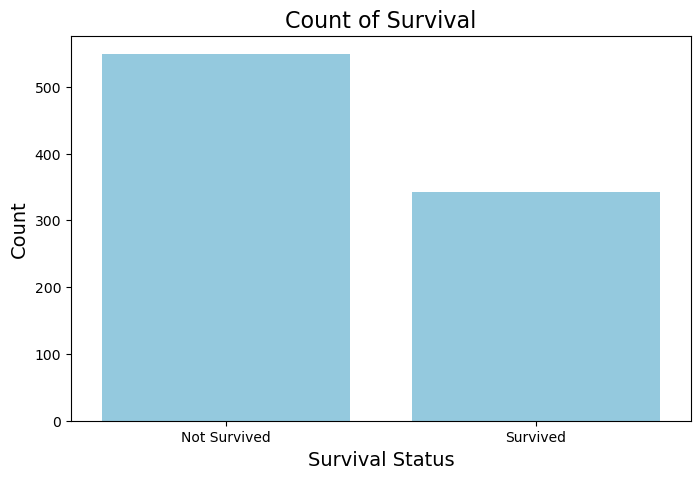

In [263]:
# EDA: 생존 여부 카운트 플롯
def plot_survival_count(train):
    plt.figure(figsize=(8, 5))  # 그래프 크기 설정
    sns.countplot(x='Survived', data=train, color='skyblue')
    
    # 제목 및 축 레이블 추가
    plt.title('Count of Survival', fontsize=16)
    plt.xlabel('Survival Status', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # X축 레이블 조정
    plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
    
    # 그래프 표시
    plt.show()

# 함수 호출
plot_survival_count(train)

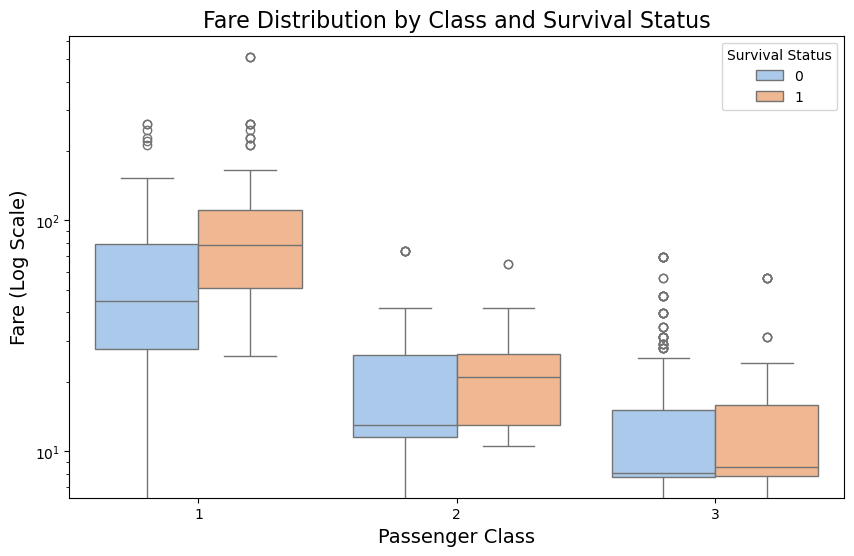

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: 객실 등급에 따른 요금 분포 시각화
def plot_fare_distribution(train):
    plt.figure(figsize=(10, 6))  # 그래프 크기 설정
    sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train, palette='pastel')

    # 제목 및 축 레이블 추가
    plt.title("Fare Distribution by Class and Survival Status", fontsize=16)
    plt.xlabel("Passenger Class", fontsize=14)
    plt.ylabel("Fare (Log Scale)", fontsize=14)
    
    # Y축 로그 스케일 설정
    plt.yscale('log')

    # 그래프 표시
    plt.legend(title='Survival Status', loc='upper right')
    plt.show()

# 함수 호출
plot_fare_distribution(train)

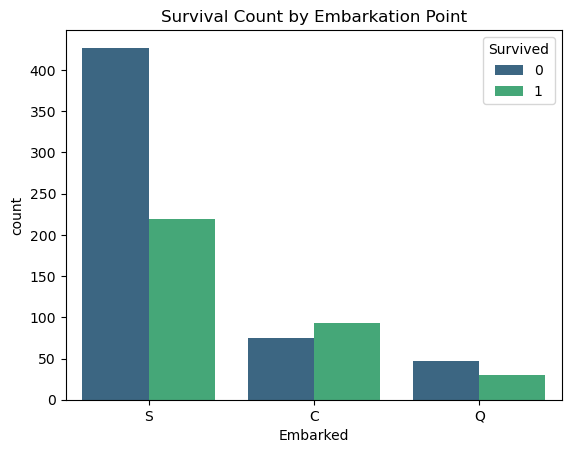

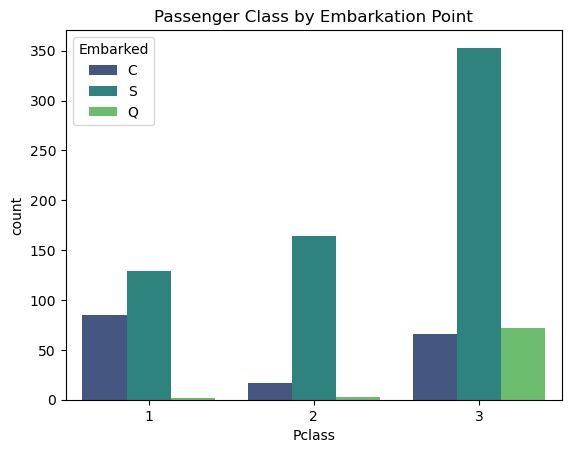

In [266]:
 #Count Plot for Embarked and Class with Survival
sns.countplot(x='Embarked', hue='Survived', data=train, palette='viridis')

plt.title("Survival Count by Embarkation Point")

plt.show()



sns.countplot(x='Pclass', hue='Embarked', data=train, palette='viridis')

plt.title("Passenger Class by Embarkation Point")

plt.show()

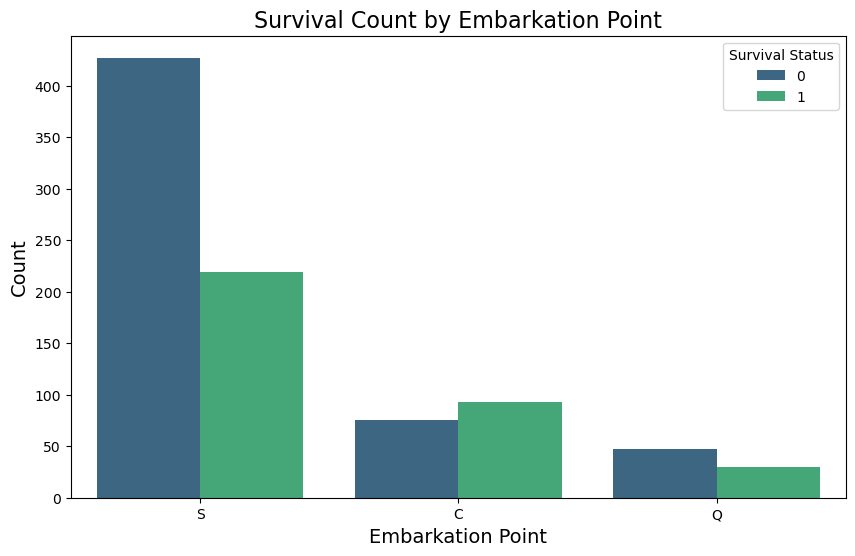

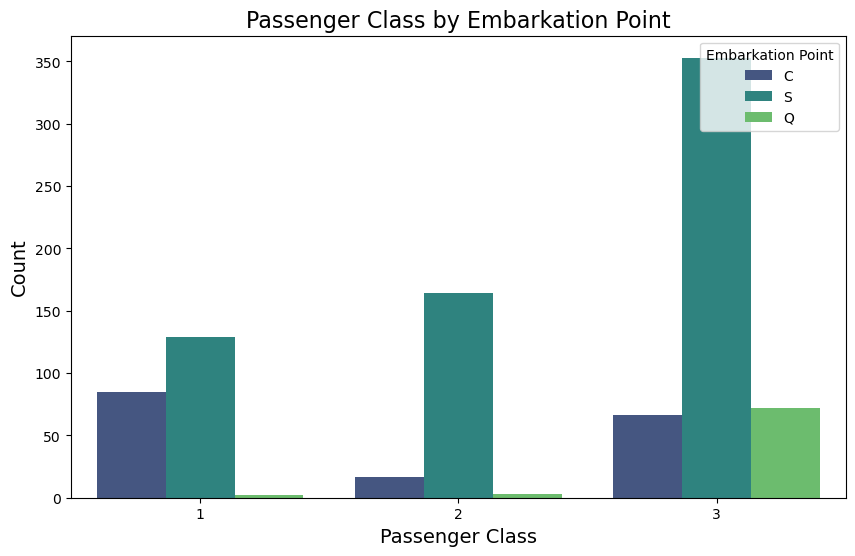

In [268]:
# EDA: 탑승 항구와 생존 여부 카운트 플롯
def plot_embarked_survival_count(train):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Embarked', hue='Survived', data=train, palette='viridis')
    plt.title("Survival Count by Embarkation Point", fontsize=16)
    plt.xlabel("Embarkation Point", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title='Survival Status', loc='upper right')
    plt.show()

# EDA: 객실 등급과 탑승 항구 카운트 플롯
def plot_class_embarked_count(train):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Pclass', hue='Embarked', data=train, palette='viridis')
    plt.title("Passenger Class by Embarkation Point", fontsize=16)
    plt.xlabel("Passenger Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title='Embarkation Point', loc='upper right')
    plt.show()

# 함수 호출
plot_embarked_survival_count(train)
plot_class_embarked_count(train)

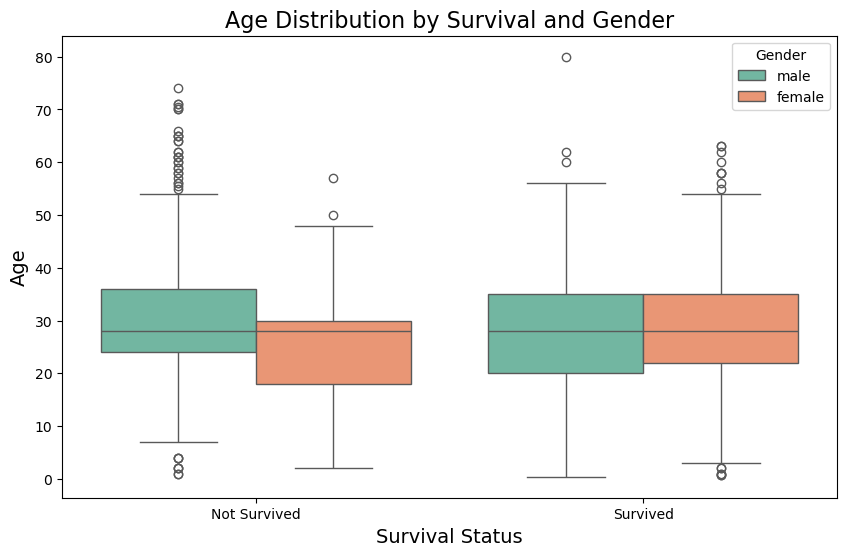

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_distribution_by_survival_and_gender(train):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Survived', y='Age', hue='Sex', data=train, palette='Set2')
    
    plt.title("Age Distribution by Survival and Gender", fontsize=16)
    plt.xlabel("Survival Status", fontsize=14)
    plt.ylabel("Age", fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
    plt.legend(title='Gender', loc='upper right')
    plt.show()

# 함수 호출
plot_age_distribution_by_survival_and_gender(train)

In [272]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 각 열에 대해 Label Encoding을 수행하는 함수 정의
def encode_categorical_features(train, test):
    # LabelEncoder 인스턴스 생성
    label_sex = LabelEncoder()
    label_embarked = LabelEncoder()
    label_cabin = LabelEncoder()
    
    # 훈련 데이터와 테스트 데이터를 합치기
    combined = pd.concat([train[['Sex', 'Embarked', 'Cabin']], test[['Sex', 'Embarked', 'Cabin']]], axis=0)

    # 성별(Sex) 변환
    combined['Sex'] = label_sex.fit_transform(combined['Sex'])
    
    # 탑승 항구(Embarked) 변환
    combined['Embarked'] = label_embarked.fit_transform(combined['Embarked'])
    
    # 객실(Cabin) 변환
    combined['Cabin'] = label_cabin.fit_transform(combined['Cabin'].astype(str))

    # 변환된 데이터를 다시 훈련 데이터와 테스트 데이터로 나누기
    train['Sex'] = combined.iloc[:len(train)]['Sex']
    train['Embarked'] = combined.iloc[:len(train)]['Embarked']
    train['Cabin'] = combined.iloc[:len(train)]['Cabin']

    test['Sex'] = combined.iloc[len(train):]['Sex']
    test['Embarked'] = combined.iloc[len(train):]['Embarked']
    test['Cabin'] = combined.iloc[len(train):]['Cabin']

    # 'Ticket'과 'Name' 열 제거
    train.drop(['Ticket', 'Name'], axis=1, inplace=True)
    test.drop(['Ticket', 'Name'], axis=1, inplace=True)

# 함수 호출
encode_categorical_features(train, test)

In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


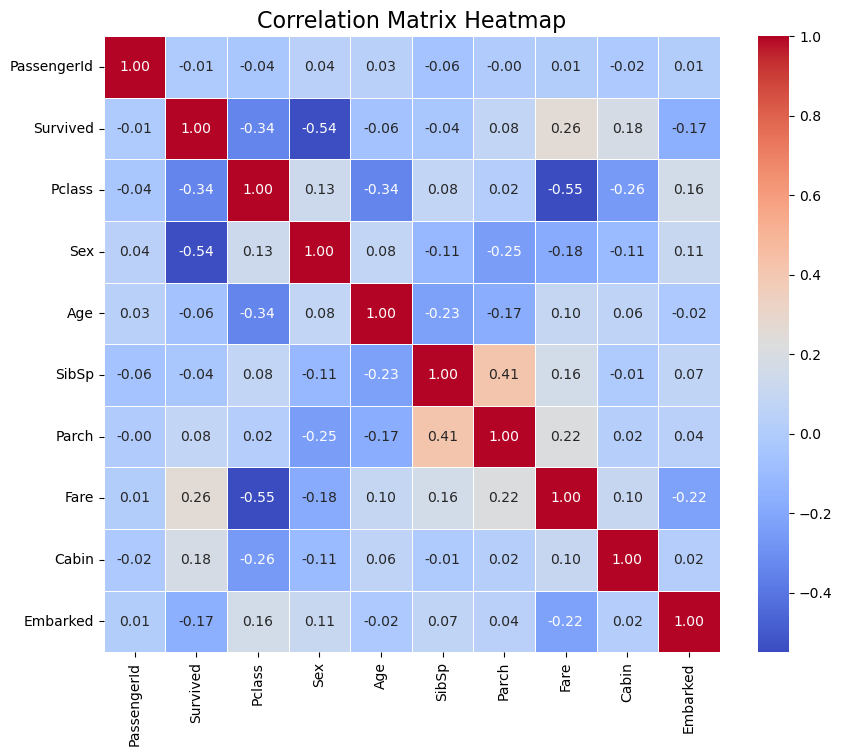

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬을 계산하기 전에 결측값 처리
# 결측값이 있는 경우, 열의 평균 또는 중앙값으로 대체할 수 있습니다.
train.fillna(train.mean(), inplace=True)  # 수치형 데이터의 평균으로 결측값 대체

# 상관 행렬 계산
correlation_matrix = train.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# 제목 설정
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [279]:
train.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.064910
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Cabin          0.180218
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [282]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [284]:
X = train.drop('Survived', axis=1)

y = train['Survived']

In [286]:
# K-겹 교차 검증 설정 (폴드 수 증가)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [288]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# 예시 데이터 준비
# X = ... (특성 데이터셋)
# y = ... (타겟 레이블)
# k_fold = KFold(n_splits=5, shuffle=True, random_state=0)  # K-겹 교차 검증 설정

# 모델 생성
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=4, random_state=0)

# 교차 검증 수행
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

# 결과 출력
print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard deviation: {:.2f}".format(scores.std()))

Cross-validation scores: [0.82222222 0.76404494 0.82022472 0.80898876 0.86516854 0.8988764
 0.80898876 0.78651685 0.73033708 0.91011236]
Mean accuracy: 82.15%
Standard deviation: 0.05


In [290]:
# 테스트 데이터 전처리
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})  # 성별을 숫자로 변환
test['Age'] = imputer.transform(test[['Age']])  # 결측값 처리
test[['Fare', 'Age']] = scaler.transform(test[['Fare', 'Age']])  # 스케일링

# 예측 수행
predictions = model.fit(X, y).predict(test)  # 모델 훈련 후 예측 수행

# 제출 데이터프레임 생성
submission = pd.DataFrame({
    'PassengerId': range(1, len(predictions) + 1),  # 예시로 PassengerId 생성
    'Survived': predictions
})

# CSV 파일로 저장
submission.to_csv('sub2.csv', index=False)

print("Submission file created: 'sub2.csv'")

Submission file created: 'sub2.csv'
